In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
HotelReview = pd.read_csv("/content/drive/MyDrive/BAP Project/Datasets/Final Datasets/Hotel_Cleaned.csv")
HotelTrain = pd.read_csv("/content/drive/MyDrive/BAP Project/Datasets/Final Datasets/train_set.csv")
HotelTest = pd.read_csv("/content/drive/MyDrive/BAP Project/Datasets/Final Datasets/test_set.csv")

In [ ]:
# Preprocess data for DecisionTree
def data_preprocessing(df):
    df['Log_WordCount'] = np.log(df['Reviews_WordCount'])
    df = df.drop(['Hotel','Titles','Reviews','Dates','No_of_Reviews','Reviews_WordCount', 'Rating',
                  'Address','Sentiment_Pos','Sentiment_Neg','Sentiment_Neu','Sentiment','Year'], axis = 1)
    df = pd.get_dummies(df, columns = ['Travel_Type','Hotel_Class'],
                        drop_first = True)
    return df

In [ ]:
def decision_tree_model(X_train, X_test, y_train, y_test, imagename):
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    }

    # Train the decision tree regressor with GridSearchCV
    clf = DecisionTreeRegressor()
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and train the model on the full training set
    best_params = grid_search.best_params_
    print("Best hyperparameters:", grid_search.best_params_)

    clf = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'])
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the testing accuracy score
    test_score = clf.score(X_test, y_test)
    print("Accuracy Score:", test_score)

    # Calculate the evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Print the evaluation metrics
    print('R2:', r2)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)

    # Print the feature importance
    feature_cols = X_train.columns.values.tolist()
    importances = clf.feature_importances_
    feature_importances = dict(zip(X_train.columns, importances))

    print("\nFeature Importances:")
    for feature, importance in feature_importances.items():
        if importance > 0:
            print(f"{feature}: {importance}")

    # Export the plot_tree image
    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names= X_train.columns.values.tolist(),
              class_names=True, filled=True, rounded=True)
    plt.show()

    dot_data = export_graphviz(clf, out_file=None, feature_names=X_train.columns,
                               filled=True, rounded=True,
                               special_characters=True, max_depth=3)  # Set to 3 to make it look clearer
    graph = pydotplus.graph_from_dot_data(dot_data)
    directory = '/content/drive/MyDrive/BAP Project/Codes/images/'
    filename = directory + imagename + '.png'
    graph.write_png(filename)
    Image(filename)


Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy Score: 0.4298810448369422
R2: 0.4298810448369422
Root Mean Squared Error: 0.34072510583402943
Mean Absolute Error: 0.19119691833606406

Feature Importances:
Review_Rating: 0.9442216896076214
Location: 0.0009559377659808817
Cleanliness: 0.0012915411305920144
Service: 0.004012942762885447
Value: 0.00033008174248736274
FreeParking: 0.000677227500025497
FreeWifi: 0.00018830183491256753
Gym: 0.0036542860407499235
BarLounge: 0.000511263528727269
EventFacilities: 0.0002223423188891116
Log_WordCount: 0.04039447908880995
Travel_Type_couple: 0.00016036126970065689
Travel_Type_family: 0.0005846303749100141
Travel_Type_friends: 0.0006470474604235967
Travel_Type_solo: 0.0007021845373079332
Hotel_Class_2.5: 0.00013700339778592715
Hotel_Class_3.0: 0.0006197920018171182
Hotel_Class_3.5: 0.000353554060165378
Hotel_Class_4.0: 0.00033533357620788885


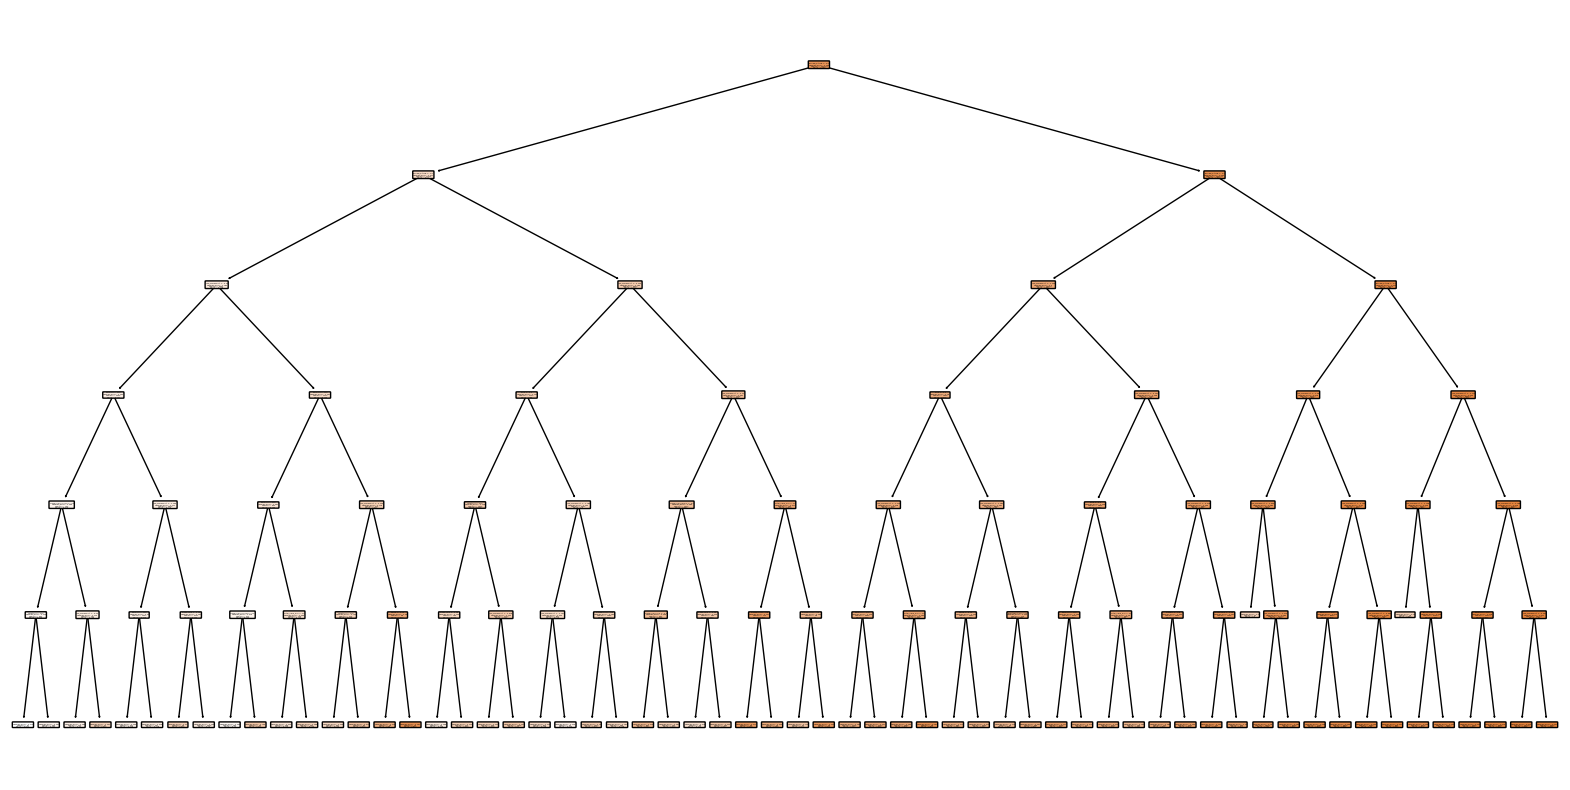

In [ ]:
HotelTrain_Processed = data_preprocessing(HotelTrain)
HotelTest_Processed = data_preprocessing(HotelTest)

y_train = HotelTrain_Processed['Sentiment_Compound']
x_train = HotelTrain_Processed.drop(['Sentiment_Compound'], axis = 1)
y_test = HotelTest_Processed['Sentiment_Compound']
x_test = HotelTest_Processed.drop(['Sentiment_Compound'], axis = 1)

decision_tree_model(x_train, x_test, y_train, y_test, "DecisionTree")